In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# wczytanie danych o populacji zawierającej grupy z powyższonym odsetkiem deaktywowanych kart kredytowych
df_deactivated = pd.read_csv(
    'https://raw.githubusercontent.com/CodersLab/DataLab_intro/main/processed/BankChurner_Deactivated.csv',
    sep=";"
)

# wczytanie danych o populacji zawierającej grupy z 'standardowym' odsetkiem deaktywowanych kart kredytowych
df_active = pd.read_csv(
    'https://raw.githubusercontent.com/CodersLab/DataLab_intro/main/processed/BankChurner_Active.csv',
    sep=";"
)

In [5]:
df_deactivated.head()

,Client_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Is_Active,Years_on_book,Customer_Age_agg,Total_Trans_Amt_agg,Total_Trans_Ct_agg
0,768805383,Existing Customer,45,M,3,3. High School,Married,3. $60K - 80K,1. Blue,39,...,1.335,1144,42,1.625,0.061,1,"(3, 4]","(40, 45]","(1000, 1500]","(40, 50]"
1,818770008,Existing Customer,49,F,5,4. Graduate,Single,1. < $40K,1. Blue,44,...,1.541,1291,33,3.714,0.105,1,"(3, 4]","(45, 50]","(1000, 1500]","(30, 40]"
2,810347208,Existing Customer,51,M,4,7. Unknown,Married,5. 120K+,3. Gold,46,...,1.975,1330,31,0.722,0.066,1,"(3, 4]","(50, 55]","(1000, 1500]","(30, 40]"
3,818906208,Existing Customer,32,M,0,3. High School,Unknown,3. $60K - 80K,2. Silver,27,...,2.204,1538,36,0.714,0.048,1,"(2, 3]","(30, 35]","(1500, 2000]","(30, 40]"
4,719661558,Existing Customer,48,M,2,4. Graduate,Single,4. $80K - 120K,1. Blue,36,...,1.524,1441,32,0.882,0.144,1,"(2, 3]","(45, 50]","(1000, 1500]","(30, 40]"


In [6]:
df_deactivated.shape

(3142, 26)

## Porównanie grup
W tej części będziemy porównywać poszczególne grupy – kolumna po kolumnie. Zbadamy w ten sposób, czy pomiędzy populacją kart aktywnych istnieją istotne rozbieżności w porównaniu do populacji, w której karty zostały zdezaktywowane.

Podobnie jak wcześniej, zanim przejdziemy do wydobywania informacji z danych, przygotujemy sobie szablon do pracy. W tym celu stworzymy dwie funkcje, jedną, która zwróci nam raport w formie tabelarycznej oraz drugą, która zwróci nam wykres.

Funkcja, która będzie zwracała tabelkę, będzie korzystała z metody Pandas crosstab. W swojej funkcjonalności jest ona bardzo zbliżona do pivot_table, ponieważ obydwie tworzą raport w formie tabeli przestawnej. Jednak, co istotne, użycie crosstab pozwala na zdecydowanie łatwiejsze wyznaczenie rozkładu procentowego poszczególnych grup w obrębie kategorii.

In [3]:
def compare_groups(col_name):
    ct = pd.crosstab(
        index=df[col_name],  # określamy, która kolumna ma być wyświetlona na wierszach
        columns=df["Group_Name"],  # określamy, że na kolumnach będą pojawiać się tylko dwie grupy (karty aktywne/nieaktywne)
        values=df["Client_ID"],  # określamy, która kolumna ma zostać zagregowana
        aggfunc="count",  # określamy funkcję do agregacji, tutaj - zliczanie
        normalize="columns"  # określamy, że chcemy wyznaczyć rozkład procentowy dla kolumn (odpowiednik podsumuje jako % kolumny z Excel)
    )

    # stworzymy sobie dodatkowo kolumnę `Diff`, która będzie mówiła nam
    # o różnicach w poszczególnych grupach
    ct["Diff"] = ct.apply(
        lambda x: x[0] - x[1],  # x[0] oznacza tutaj kolumnę Active, zaś x[1] Deactivated
        axis=1  # określamy, że chcemy przebiegać ramkę powyższą funkcją wiersz po wierszu
    )
    return ct

In [17]:
def visualize_comparison(ct):
    # w pierwszej kolejności usuwamy kolumnę diff, nie chcemy jej wyświetlać na wykresie
    _ct = ct.drop(columns=["Diff"])

    # tworzenie wykresu
    fig = _ct.plot(
        kind="bar",  # określamy typ wykresu
        title="Comparision between groups",
        figsize=(15, 10)
        )

    return fig

# Przygotowanie danych
W tym kroku wykonamy następujące czynności:

do ramki df_deactivated dodamy nową kolumnę Group_Name, w której będzie zawarta informacja o przynależności do grupy Deactivated
do ramki df_active dodamy również kolumnę Group_Name, w której będzie tylko wartość Active
połączymy je w jedną ramkę zapisaną do zmiennej df, która posłuży do wyznaczenia porównania.

In [5]:
df_deactivated["Group_Name"] = "Deactivated"
df_active["Group_Name"] = "Active"

df = pd.concat([df_active, df_deactivated])

In [19]:
gender_ct = compare_groups("Gender")
gender_ct

Group_Name,Active,Deactivated,Diff
Gender,,,
F,0.548175,0.486633,0.061542
M,0.451825,0.513367,-0.061542


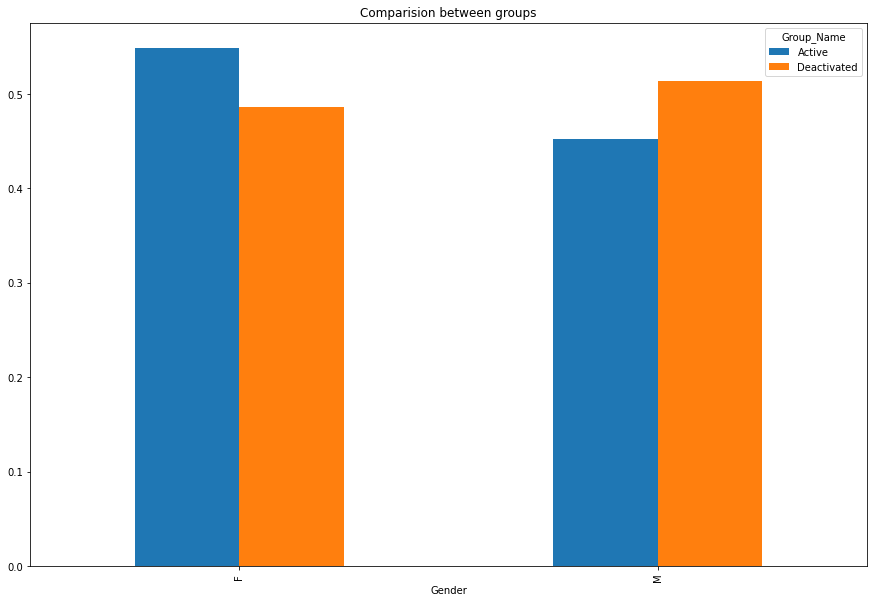

In [18]:
visualize_comparison(gender_ct)

Porównanie według Education_level

In [20]:
education_level_ct = compare_groups("Education_Level")
education_level_ct

Group_Name,Active,Deactivated,Diff
Education_Level,,,
1. Uneducated,0.148890,0.142266,0.006624
2. College,0.099785,0.100573,-0.000788
3. High School,0.198282,0.199873,-0.001591
4. Graduate,0.309807,0.306811,0.002996
5. Post-Graduate,0.051110,0.050605,0.000505
6. Doctorate,0.042233,0.049650,-0.007417
7. Unknown,0.149893,0.150223,-0.000330


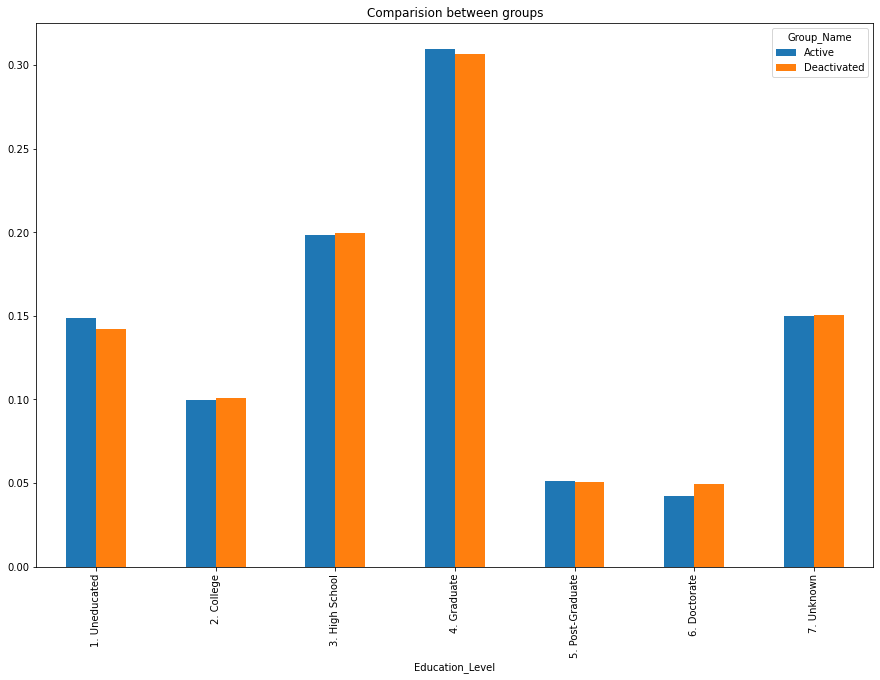

In [21]:
visualize_comparison(education_level_ct)

Podsumowując, zmienna Education_Level nie różnicuje grupy kart dezaktywowanych oraz aktywnych.

Porównanie według Marital_Status

In [22]:
marital_status_ct = compare_groups("Marital_Status")
marital_status_ct

Group_Name,Active,Deactivated,Diff
Marital_Status,,,
Divorced,0.074302,0.072884,0.001419
Married,0.439227,0.515277,-0.076050
Single,0.404295,0.356143,0.048152
Unknown,0.082176,0.055697,0.026479


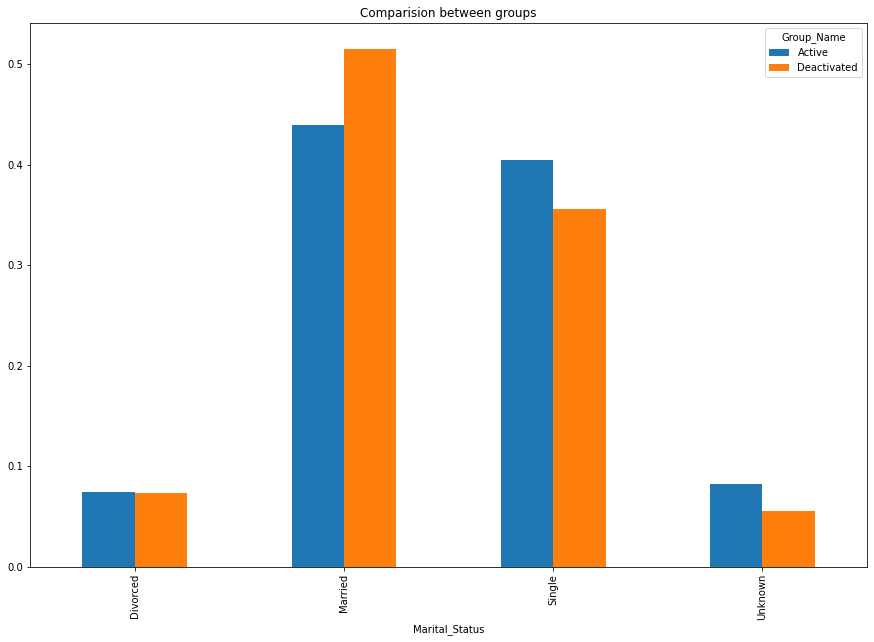

In [23]:
visualize_comparison(marital_status_ct)

W przypadku stanu cywilnego możemy zauważyć, że dla kart aktywnych zdecydowanie więcej mamy singli (+4.8%). Karty dezaktywowane z kolei cechują się większym odsetkiem właścicieli, którzy są w związku małżeńskim (7.6%).

Porównanie według Income_Category

In [24]:
income_category_ct = compare_groups("Income_Category")
income_category_ct

Group_Name,Active,Deactivated,Diff
Income_Category,,,
1. < $40K,0.358769,0.335773,0.022995
2. $40K - 60K,0.178096,0.173775,0.004321
3. $60K - 80K,0.136722,0.142266,-0.005545
4. $80K - 120K,0.146457,0.162954,-0.016497
5. 120K+,0.068576,0.078931,-0.010355
6. Unknown,0.111382,0.106302,0.005080


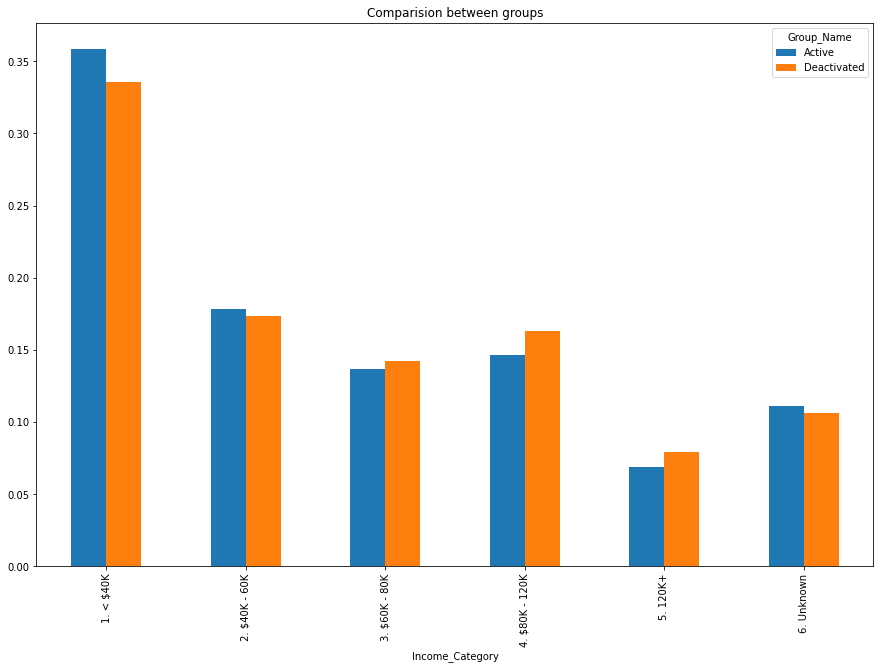

In [25]:
visualize_comparison(income_category_ct)

Porównanie według Card_Category

In [26]:
card_category_ct = compare_groups("Card_Category")
card_category_ct

Group_Name,Active,Deactivated,Diff
Card_Category,,,
1. Blue,0.920401,0.957034,-0.036633
2. Silver,0.062849,0.036919,0.025930
3. Gold,0.014173,0.005411,0.008763
4. Platinum,0.002577,0.000637,0.001940


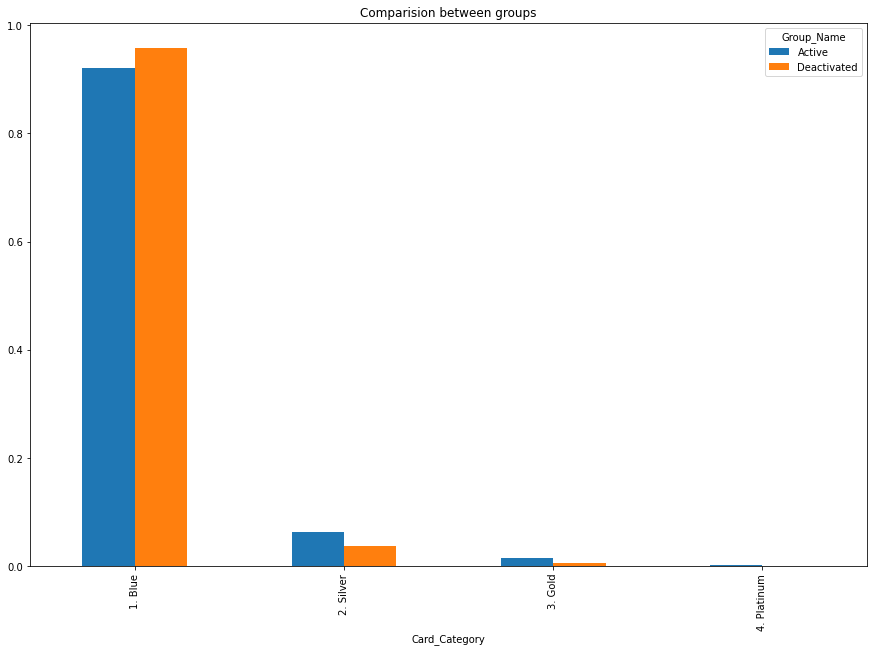

In [27]:
visualize_comparison(card_category_ct)

Porównanie według Years_on_book

In [28]:
years_on_book_ct = compare_groups("Years_on_book")
years_on_book_ct

Group_Name,Active,Deactivated,Diff
Years_on_book,,,
"(1, 2]",0.062849,0.129854,-0.067005
"(2, 3]",0.541016,0.521642,0.019374
"(3, 4]",0.337724,0.269892,0.067832
"(4, 5]",0.058411,0.078612,-0.020201


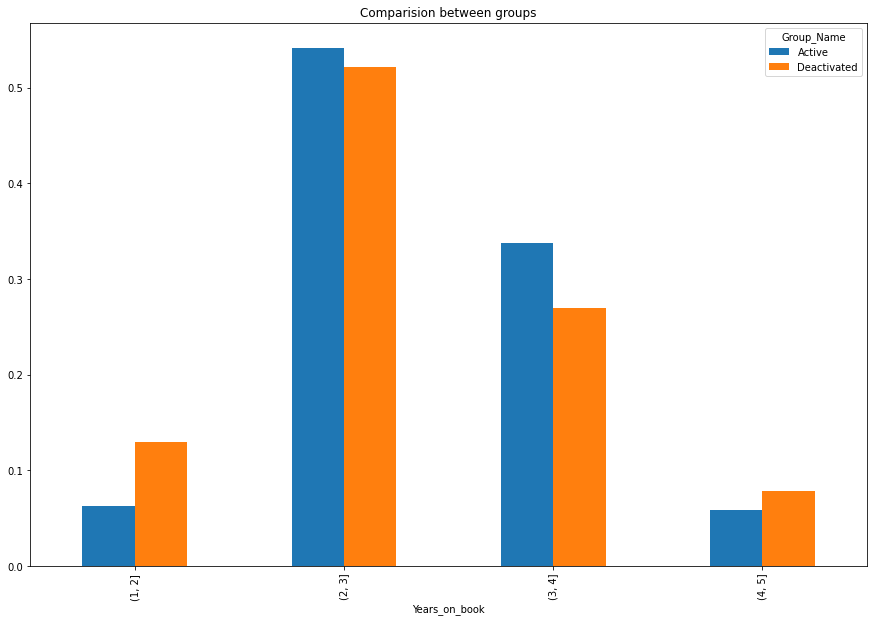

In [29]:
visualize_comparison(years_on_book_ct)

W przypadku zmiennej Years_on_book, która jest agregacją Month_on_book do lat, możemy powiedzieć, że:

dla kart założonych do dwóch lat, odsetek kart dezaktywowanych jest wyższy o blisko 7%,
dla kart aktywnych od ponad dwóch do czterech lat odsetek kart dezaktywowanych jest niższy, szczególnie w grupie kart założonych od trzech do czterech lat,
dla kart aktywnych od czterech do pięciu lat, odsetek kart dezaktywowanych jest wyższy o 2%.
Otrzymaliśmy więc wnioski częściowo zgodne z oczekiwaniami, ponieważ wraz ze wzrostem użytkowania kart, odsetek dezaktywacji maleje, z wyłączeniem grupy (4, 5], która być może wymaga odrębnej analizy.

Niemniej na ten moment stwierdzimy, że zmienna Years_on_book istotnie różnicuje wejściowy zbiór danych.

Porównanie według Customer_Age_agg

In [30]:
customer_age_ct = compare_groups("Customer_Age_agg")
customer_age_ct

Group_Name,Active,Deactivated,Diff
Customer_Age_agg,,,
"(25, 30]",0.015891,0.049013,-0.033122
"(30, 35]",0.043951,0.110439,-0.066488
"(35, 40]",0.126843,0.188415,-0.061572
"(40, 45]",0.249248,0.166454,0.082794
"(45, 50]",0.259413,0.183323,0.076090
"(50, 55]",0.176092,0.164545,0.011547
"(55, 75]",0.128561,0.137810,-0.009249


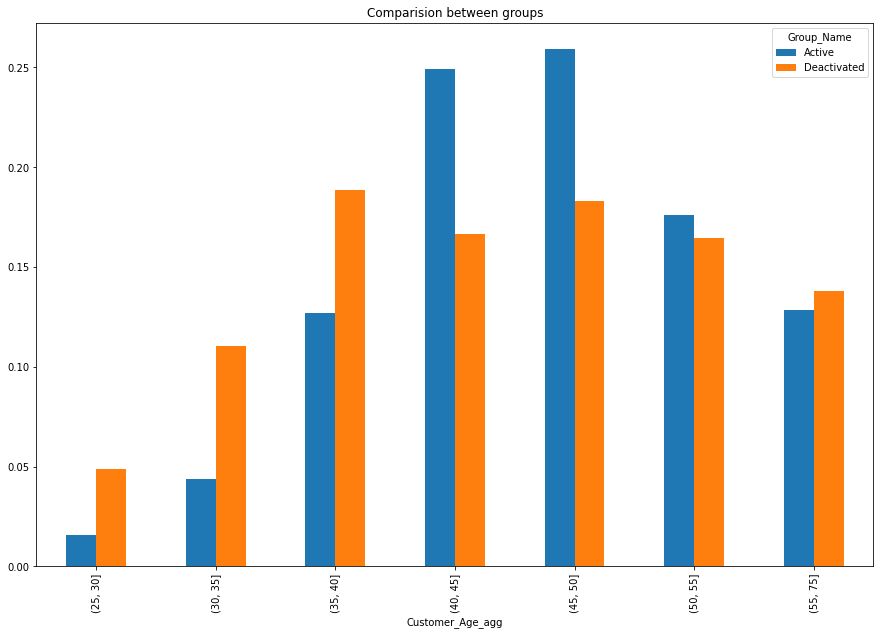

In [31]:
visualize_comparison(customer_age_ct)

Powyższy wykres oraz tabela okazują nam jasno, że Customer_Age_agg po wyodrębnieniu obydwóch grup istotnie różnicuje obydwa zbiory danych. Zwróćmy uwagę na różnice, jakie występują pomiędzy grupami:

poniżej 35 lat - tutaj zdecydowanie dominują karty, które zostały dezaktywowane,
pomiędzy 35 a 55 lat - tutaj zauważamy podwyższony odsetek posiadaczy kart aktywnych,
powyżej 55 lat - różnice są dyskusyjne, ponieważ różnica wynosi niecały 1 punkt procentowy.
Niemniej, możemy powiedzieć, że zmienna Customer_Age_agg istotnie różnicuje obydwie populacje.

Warto w tym miejscu zaznaczyć, że w poprzednim notatniku, gdy analizowaliśmy obydwie grupy jako jedną populację ten obraz był zaciemniony – tj. nie biorąc pod uwagę wieku posiadacza kart nie obserwowaliśmy istotnych zmian pomiędzy odsetkiem kart aktywnych czy dezaktywowanych. Innymi słowy, po rozbiciu zbioru, otrzymaliśmy kolejny wniosek idący z danych.

Podsumowanie
W tym notatniku porównaliśmy między sobą dwie, wyselekcjonowane wcześniej populacje użytkowników kart dezaktywowanych oraz kart nadal aktywnych. Za pomocą zmiennych kategorycznych określiliśmy punkty rozbieżności pomiędzy nimi oraz sprawdziliśmy, gdzie podobieństwa występują. Co istotne, po rozdzieleniu zbioru na dwie podgrupy otrzymaliśmy dodatkowe wnioski płynące z danych takich jak Customer_Age_agg, Marital_Status czy Gender, które przy analizie danych nie zostały określone jako mogące posłużyć do wyodrębnienia oraz opisania poszczególnych grup.

# Podsumowanie

Na zakończenie tego kursu, podsumujemy cały proces przeprowadzonej analizy oraz wydamy potencjalne rekomendacje, które mogą pozwolić zmniejszyć odpływ kart kredytowych.

Wnioski płynące z danych
Ponieważ w firmie dzieje się coraz gorzej, zostaliśmy poproszeni o przeanalizowanie jednego z jej obszarów – kart kredytowych. Otrzymaliśmy informację, że w tym roku został zaobserwowany wzrost liczby klientów, którzy przestali korzystać z karty kredytowej.

W celu przeprowadzenia analizy posłużyliśmy się zbiorem danych pochodzącym z platformy Kaggle – Credit Card customers, za pomocą którego symulowaliśmy rzeczywiste zadanie.

Pierwszy krok naszego zadania polegał na eksploracyjnej analizie danych. W jej trakcie przeanalizowaliśmy zmienne kategoryczne, które posłużyły nam do wydobycia informacji płynących z posiadanego zasobu. Co istotne, w trakcie procesu wyodrębniliśmy dwie zmienne – Total_Trans_Amt_agg oraz Total_Trans_Ct_agg, dzięki którym podzieliliśmy naszą populację na dwie mniejsze, które różniły się przede wszystkim odsetkiem dezaktywowanych kart kredytowych.

Dzięki podziałowi populacji na dwie grupy byliśmy w stanie porównać je między sobą i określić istotne różnice, dzięki czemu stwierdziliśmy, że częściej dezaktywowane były karty posiadane przez:

mężczyzn (+6%),
osoby w związkach małżeńskich (+7.6%),
klientów, którzy posiadają kartę do dwóch lat (+6.7%),
osoby w wieku do 40 lat (około + 6%, w zależności od kategorii)
W ten sposób określiliśmy potencjalną grupę, do której można kierować np. dodatkowe promocje dotyczące kart kredytowych, co skłoniłoby te osoby do dalszego korzystania z nich. Innym przykładem może być pewna bonifikata za korzystanie z karty przez okres dłuższy niż dwa lata (choćby niższe oprocentowanie, podniesienie limitu, wydłużenie terminów spłaty), być może po tym okresie klient przywiązuje się do karty.

Wyżej wymienione propozycje są przykładowe, niejednokrotnie dla odbiorców biznesowych samo podanie charakterystyki grupy jest wystarczające, aby stworzyć na jej podstawie dalsze działania mające na celu zmianę trendu. Tak przeprowadzoną analizę warto omówić w trakcie spotkania, które zmieni się w burzę mózgów. Uczestnictwo osób pracujących bezpośrednio w danym procesie może sprawić, że analiza zostanie pogłębiona i wyciągnięte zostaną jeszcze inne cenne, dodatkowe wnioski.